# 1.Load Libraries

In [1]:
import pandas as pd 
import numpy as np 
import requests
import os
import json
import re
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns 
%matplotlib inline

# 2.Gather Data

   ### 2.1. Enhanced Twitter Archive 

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

   ### 2.2. Image Predictions File

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
with open(os.path.join(url.split('/')[-1]), mode= 'wb') as file:
    file.write(response.content)
file_name = file.name

In [5]:
image_predictions_df = pd.read_csv(file_name, sep='\t')

   ### 2.3. Additional Data via the Twitter API

In [6]:
df_list= []
with open('tweet-json.txt', 'r') as file:
    for line in file :
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_list.append({
            'tweet_id': tweet_id,
            'retweet_count': retweet_count,
            'favorite_count': favorite_count
        })
api_df = pd.DataFrame(df_list)


# 3.Asses Data

   ### 3.1.Assessing in Enhanced Twitter Archive

In [7]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
archive_df[archive_df['rating_numerator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
archive_df[archive_df['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [11]:
sum(archive_df.duplicated())

0

   ### 3.2. Image Predictions File

In [12]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
sum(image_predictions_df.duplicated())

0

In [15]:
image_predictions_df['p1'].head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

   ### 3.3. Additional Data via the Twitter API

In [16]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [17]:
api_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [18]:
sum(api_df.duplicated())

0

   ### Asessment :

    Quality issues:
    
    
        1.archive_df 
          - tweet_id is int not string 
          - timesamp column is object type not datetime type
          - none value instead of nan in name, doggo, floofer, pupper and puppo columns
          - missing values in name column
          - missing values in expanded_urls column 
          - validity issue in rating_numerator that is less than 10 
          - validity issue in rating_denominator that is more than 10 
          - 78 rows of replies and 181 rows of retweets
      
        2.image_prediction_df 
          - missing rows (2075 instead of 2356)
          - int data type for tweet_id column instead of object 
          - lowercase and uppercase in p1, p2 and p3 columns
          
        3.api_df 
          - missing 2 rows (2354 instead of 2356)
          - tweet_id is int not string
          
    Tidiness issues:
          1. dog stages presented in 4 columns instead of one column
          2. p1,p2 and p3 values represented as columns
          3. all the data can be represented in 1 dataframe instead of 3 dataframes

# 4.Clean Data

### 4.1 Create copies of the original dataframes

In [19]:
clean_archive_df = archive_df.copy()
clean_api_df = api_df.copy()
clean_image_predictions_df = image_predictions_df.copy() 

### 4.2 Solve Tideness issues
#### Tideness issues

     1.dog stages values presented in 4 columns instead of one column
     
   **Define** 
      
      - replace the 4 columns value with one column named dog_stage

**Code**

In [20]:
# replace 'None' value with '' in  doggo, floofer, pupper and puppo columns 
clean_archive_df['doggo'] = clean_archive_df['doggo'].replace('None', '')

clean_archive_df['floofer'] = clean_archive_df['floofer'].replace('None', '')

clean_archive_df['pupper'] = clean_archive_df['pupper'].replace('None', '')

clean_archive_df['puppo'] = clean_archive_df['puppo'].replace('None', '')


In [21]:
clean_archive_df['floofer'].value_counts()

           2346
floofer      10
Name: floofer, dtype: int64

In [22]:
clean_archive_df['dog_stage'] = clean_archive_df['doggo'] + clean_archive_df['floofer'] + clean_archive_df['pupper'] + clean_archive_df['puppo'] 

In [23]:
clean_archive_df['dog_stage'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [24]:
clean_archive_df = clean_archive_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [25]:
clean_archive_df['dog_stage'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [26]:
# replace '' value with nan in  dog_stage column 
clean_archive_df['dog_stage'] = clean_archive_df['dog_stage'].replace('', np.nan)

In [27]:
# change the dog stage value that contains 2 strings manually 
clean_archive_df['dog_stage'] = clean_archive_df['dog_stage'].replace({'doggopupper': 'doggo-pupper','doggopuppo':'doggo-puppo','doggofloofer':'doggo-floofer'})

**Test**

In [28]:
clean_archive_df['dog_stage'].value_counts()

pupper           245
doggo             83
puppo             29
doggo-pupper      12
floofer            9
doggo-floofer      1
doggo-puppo        1
Name: dog_stage, dtype: int64

      2. p1,p2 and p3 values represented as columns
        
   **Define**
     
       - convert p1, p2 and p3 columns value to one prediction column
           
   **Code**   

In [29]:
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
clean_image_predictions_df.columns = cols

# Reshaping the dataframe
reshaped_df = pd.wide_to_long(clean_image_predictions_df, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

In [30]:
# change all the prediction values to lowercase to avoid any future issue
reshaped_df['prediction'] = reshaped_df['prediction'].str.lower()

**test**

In [31]:
reshaped_df.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


      3. all the data can be represented in 1 dataframe instead of 3 dataframes
      
**Define**
  
  -  merge the archive_df and api_df on tweet_id and present as all_tweet_data
  -  merge all_tweet_data and imag_predictions_df and present as master_data

**Code**

In [32]:
# combine 2 observational units in one table
all_tweet_data = pd.merge(clean_archive_df, clean_api_df, on='tweet_id')

In [33]:
all_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2354 non-null   object 
 4   source                      2354 non-null   object 
 5   text                        2354 non-null   object 
 6   retweeted_status_id         179 non-null    float64
 7   retweeted_status_user_id    179 non-null    float64
 8   retweeted_status_timestamp  179 non-null    object 
 9   expanded_urls               2295 non-null   object 
 10  rating_numerator            2354 non-null   int64  
 11  rating_denominator          2354 non-null   int64  
 12  name                        2354 non-null   object 
 13  dog_stage                   379 n

In [34]:
 master_data = pd.merge(all_tweet_data, reshaped_df, on='tweet_id')

In [35]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6219 entries, 0 to 6218
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    6219 non-null   int64  
 1   in_reply_to_status_id       69 non-null     float64
 2   in_reply_to_user_id         69 non-null     float64
 3   timestamp                   6219 non-null   object 
 4   source                      6219 non-null   object 
 5   text                        6219 non-null   object 
 6   retweeted_status_id         237 non-null    float64
 7   retweeted_status_user_id    237 non-null    float64
 8   retweeted_status_timestamp  237 non-null    object 
 9   expanded_urls               6219 non-null   object 
 10  rating_numerator            6219 non-null   int64  
 11  rating_denominator          6219 non-null   int64  
 12  name                        6219 non-null   object 
 13  dog_stage                   960 n

### 4.3 Solve Quality Issues
  
         1. 78 rows of replies and 181 rows of retweets
 
 **Define**
 
         - Drop the the retweets and replies and keep original tweets only
     
 **Code**

In [36]:
master_data = master_data.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

**Test**

In [37]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6219 entries, 0 to 6218
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            6219 non-null   int64  
 1   timestamp           6219 non-null   object 
 2   source              6219 non-null   object 
 3   text                6219 non-null   object 
 4   expanded_urls       6219 non-null   object 
 5   rating_numerator    6219 non-null   int64  
 6   rating_denominator  6219 non-null   int64  
 7   name                6219 non-null   object 
 8   dog_stage           960 non-null    object 
 9   retweet_count       6219 non-null   int64  
 10  favorite_count      6219 non-null   int64  
 11  jpg_url             6219 non-null   object 
 12  img_num             6219 non-null   int64  
 13  prediction_level    6219 non-null   int64  
 14  prediction          6219 non-null   object 
 15  confidence          6219 non-null   float64
 16  breed 

         2. validity issue in rating_numerator that is less than 10 and weird values

**Define**

      - assest all the rows with rating_numerator as ones in the tweet text 
      - remove all numerator values more less than 6
      
**Code**

In [38]:
num_p = re.compile('(\d+\.?\d?\d?)\/(\d{1,3})')
master_data['rating_numerator'] = master_data['text'].str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')

master_data = master_data[master_data['rating_numerator'] > 6.00]

**Test**

In [39]:
master_data['rating_numerator'].value_counts()

12.00      1419
10.00      1287
11.00      1239
13.00       849
9.00        453
8.00        285
7.00        156
14.00       120
144.00        3
15.00         3
24.00         3
80.00         3
60.00         3
44.00         3
1776.00       3
9.75          3
11.26         3
11.27         3
121.00        3
45.00         3
420.00        3
99.00         3
143.00        3
165.00        3
13.50         3
204.00        3
84.00         3
50.00         3
88.00         3
Name: rating_numerator, dtype: int64

       3. validity issue in rating_denominator that is more than 10
       
**Define**
         
         - set the denominator value to 10 for all the rows
         - get numerator values below 15 

**Code**

In [40]:
dog_count = master_data.rating_denominator[master_data.rating_numerator >= 40]/10

master_data.loc[master_data.rating_numerator >= 40, ['rating_numerator', 'rating_denominator']] = [master_data.rating_numerator[master_data.rating_numerator >= 40]/dog_count, 10]
master_data = master_data[master_data['rating_numerator'] < 15]

C:\Users\PC\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


**Test**

In [41]:
master_data[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
0,13.0,10
1,13.0,10
2,13.0,10
3,13.0,10
4,13.0,10
...,...,...
6214,7.0,10
6215,7.0,10
6216,8.0,10
6217,8.0,10


       4. missing values in name column
       
**Define**
       
    - replace all the none values, lowercase strings and even the strings with lenght < 3 with nan if name is the tweet text
       
**Code**

In [42]:
# replace all the none values, lowercase strings and even the strings with lenght < 3 with nan
name_pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in master_data.iterrows():
    if row['name'][0].islower() or len(row['name'])  < 3 or row['name'] == 'None':
        try:
            c_name = re.findall(name_pattern, row['text'])[0]
            master_data.loc[index,'name'] = master_data.loc[index,'name'].replace(row['name'], c_name)
        except IndexError:
            master_data.loc[index,'name'] = np.nan 

**Test**

In [43]:
master_data[master_data['name'] == 'None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,prediction_level,prediction,confidence,breed


         5. tweet_id is int not string
         
**Define**
        
        - change the tweet_id data type to string
        
**Code**

In [44]:
#change tweet_id data type
master_data['tweet_id'] = master_data['tweet_id'].astype(str)

**Test**

In [45]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5859 entries, 0 to 6218
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            5859 non-null   object 
 1   timestamp           5859 non-null   object 
 2   source              5859 non-null   object 
 3   text                5859 non-null   object 
 4   expanded_urls       5859 non-null   object 
 5   rating_numerator    5859 non-null   float64
 6   rating_denominator  5859 non-null   int64  
 7   name                4092 non-null   object 
 8   dog_stage           948 non-null    object 
 9   retweet_count       5859 non-null   int64  
 10  favorite_count      5859 non-null   int64  
 11  jpg_url             5859 non-null   object 
 12  img_num             5859 non-null   int64  
 13  prediction_level    5859 non-null   int64  
 14  prediction          5859 non-null   object 
 15  confidence          5859 non-null   float64
 16  breed 

     6. timesamp column is object type 
     
**Define**

       - change timestamp data type to datetime
       
**Code**

In [46]:
#change timestamp data type
master_data['timestamp'] = pd.to_datetime(master_data['timestamp'])

**Test**

In [47]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5859 entries, 0 to 6218
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            5859 non-null   object             
 1   timestamp           5859 non-null   datetime64[ns, UTC]
 2   source              5859 non-null   object             
 3   text                5859 non-null   object             
 4   expanded_urls       5859 non-null   object             
 5   rating_numerator    5859 non-null   float64            
 6   rating_denominator  5859 non-null   int64              
 7   name                4092 non-null   object             
 8   dog_stage           948 non-null    object             
 9   retweet_count       5859 non-null   int64              
 10  favorite_count      5859 non-null   int64              
 11  jpg_url             5859 non-null   object             
 12  img_num             5859 non-null 

        7. prediction level is int 
        
**Define** 
   
        - change the prediction level column data type to string
        
**Code**

In [48]:
master_data['prediction_level'] = master_data['prediction_level'].astype(str) 

**Test**

In [49]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5859 entries, 0 to 6218
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            5859 non-null   object             
 1   timestamp           5859 non-null   datetime64[ns, UTC]
 2   source              5859 non-null   object             
 3   text                5859 non-null   object             
 4   expanded_urls       5859 non-null   object             
 5   rating_numerator    5859 non-null   float64            
 6   rating_denominator  5859 non-null   int64              
 7   name                4092 non-null   object             
 8   dog_stage           948 non-null    object             
 9   retweet_count       5859 non-null   int64              
 10  favorite_count      5859 non-null   int64              
 11  jpg_url             5859 non-null   object             
 12  img_num             5859 non-null 

      8.  mix of lowercase and uppercase names in the prediction column
      
**Define**
 
     - lowecase the prediction column values
     
**Code**

In [50]:
master_data['prediction'] = master_data['prediction'].str.lower()

**Test**

In [51]:
master_data.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,prediction_level,prediction,confidence,breed
1311,806242860592926720,2016-12-06 21:04:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Dave. He's currently in...,https://twitter.com/dog_rates/status/783334639...,12.0,10,Dave,NaN,13616,0,https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg,2,1,cardigan,0.593858,True
1335,804738756058218496,2016-12-02 17:27:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Django. He accidentally opened the fro...,https://twitter.com/dog_rates/status/804738756...,12.0,10,Django,NaN,4480,15326,https://pbs.twimg.com/media/CysBn-lWIAAoRx1.jpg,1,1,tibetan_mastiff,0.915790,True
4155,684122891630342144,2016-01-04 21:23:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene of two pups that want nothi...,https://twitter.com/dog_rates/status/684122891...,11.0,10,NaN,NaN,539,2176,https://pbs.twimg.com/media/CX5-HslWQAIiXKB.jpg,1,1,cheetah,0.822193,False
4140,684222868335505415,2016-01-05 04:00:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,11.0,10,NaN,NaN,1563,4225,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,1,soft-coated_wheaten_terrier,0.791182,True
5942,667546741521195010,2015-11-20 03:35:20+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,9.0,10,George,NaN,138,355,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1,3,teddy,0.004047,False


# 5. Store Final Data

In [52]:
master_data.to_csv('twitter_archive_master.csv', index=False)

# 6. Data Analysis and Visualization



   **6.1. Show the most famous 5 dog breeds**

<AxesSubplot:>

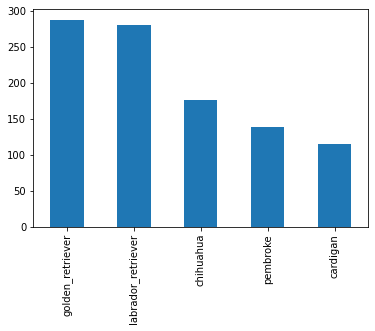

In [53]:
# visualize the most famous five dog breeds
master_data['prediction'].value_counts()[0:5].plot(kind='bar')

**6.2 show the different percentage of each dog stage**

In [54]:
dog_stage_value_counts = master_data['dog_stage'].value_counts()
dog_stage_value_counts 


pupper           621
doggo            201
puppo             69
doggo-pupper      30
floofer           21
doggo-puppo        3
doggo-floofer      3
Name: dog_stage, dtype: int64

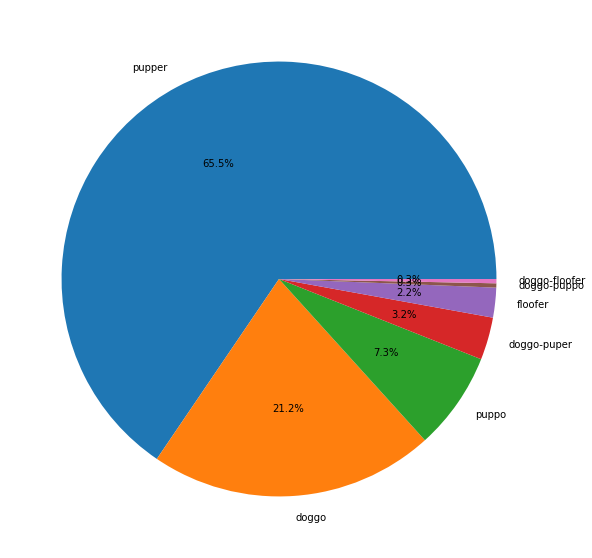

In [55]:
labels_data =['pupper', 'doggo', 'puppo', 'doggo-puper','floofer','doggo-puppo', 'doggo-floofer']
fig = plt.figure(figsize= (10,10))
plt.pie(dog_stage_value_counts , labels= labels_data, autopct='%1.1f%%')
plt.show()

**6.3 show the proportion between the retweet counts and favorite counts for each dog stage** 

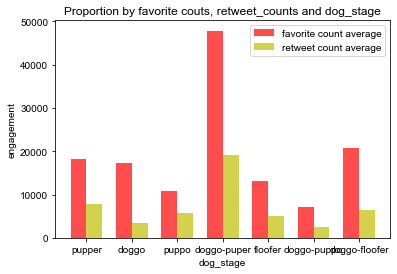

In [56]:
copy_master_data = master_data.copy()
avg_favorite_count_dog_stage = copy_master_data.groupby(['dog_stage'])['favorite_count'].mean()

avg_retweet_count_dog_stage = copy_master_data.groupby(['dog_stage'])['retweet_count'].mean()
ind = np.arange(len(avg_favorite_count_dog_stage))  # the x locations for the groups
width = 0.35

red_bars = plt.bar(ind, avg_favorite_count_dog_stage, width, color='r', alpha=.7, label='favorite count average')
yellow_bars = plt.bar(ind + width, avg_retweet_count_dog_stage, width, color='y', alpha=.7, label='retweet count average')

plt.ylabel('engagement')
plt.xlabel('dog_stage')
plt.title('Proportion by favorite couts, retweet_counts and dog_stage')

locations = ind + width / 2  # xtick locations
labels = ['pupper', 'doggo', 'puppo', 'doggo-puper','floofer', 'doggo-puppo', 'doggo-floofer']

plt.xticks(locations, labels)

# legend
plt.legend()

sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(15,6)})

**6.4 show the relationship between the favorite counts and retweet counts**

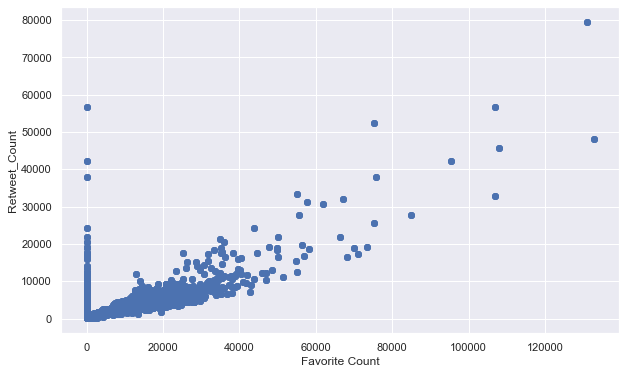

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = master_data['favorite_count'], y = master_data['retweet_count'])
plt.xlabel("Favorite Count")
plt.ylabel("Retweet_Count")
plt.show()

**6.5 timeseries shows how much rating numerator changes over time**

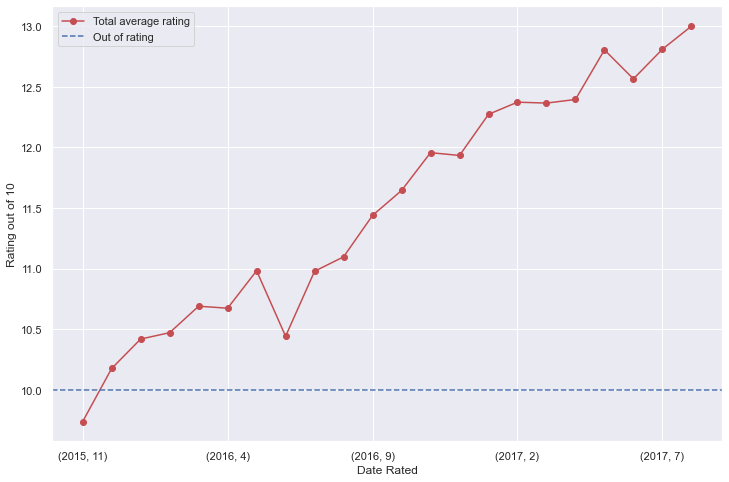

In [58]:
master_data_t = master_data.copy()
master_data_t.index = master_data['timestamp']
master_data_t.drop(columns= 'timestamp', inplace=True)
master_data_t.sort_index(inplace=True)
data_to_plot = master_data_t.groupby([(master_data_t.index.year),(master_data_t.index.month)]).rating_numerator.mean()

data_to_plot.plot(style='-ro', figsize=(12,8),label='Total average rating')

plt.axhline(y=10.0, color='b', linestyle='--', label='Out of rating')

plt.xlabel('Date Rated')
plt.ylabel('Rating out of 10')
plt.legend()